## <p style="text-align: right;"> Nic Wiggins</p>

In order to successfully complete this assignment, you need to participate both individually and in groups during class.

# In-Class Assignment: Solving Systems of Linear Equations

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Sextic_Graph.svg/1200px-Sextic_Graph.svg.png" width='50%'>
    

### Agenda for today's class (80 minutes)

</p>

1. (20 minutes) Understanding the Column Picture and Spanning a Space.
1. (20 minutes) Review
1. (20 minutes) Solving Systems of Linear equations
1. (20 minutes) Practice - Curve Fitting Example

In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

# 1. Understanding the column picture and Spanning a space.

In the first pre-class assignment, we talked about the column picture for a system of linear equations. Here, we emphasize it here again. Consider the following:

### Column vector format:

We can write a system of equations as a linear combination of column vectors:

$$ 
c
\left[
\begin{matrix}
    1 \\ 20  
 \end{matrix}
\right]
+
b
\left[
\begin{matrix}
    1 \\ 25  
 \end{matrix}
\right]
=
\left[
\begin{matrix}
 30 \\ 690
\end{matrix}
\right]
$$

**Note** We did this problem before, and the solution to this set of equations is $c=12$ and $b=18$

### Column Picture:

Lets plot this "column picture" which shows how the above equation is a "linear combination" of the two column vectors.  

One way to think about this is we can only move in straight lines in two directions. The first direction is (1,20) and the second is (1,25).  The solution to the problem is how far in each direction we need to move to get at our final destination of (30,690).

The first column is a vector in the (1,20) direction. The variable $c$ is how far in the (1,20) direction we want to go.  Then $b$ is how far in the (1,25) direction we want to go to arrive at the point (30,690).

We will use the ```matplotlib``` function ```arrow``` to plot the vectors.  The arrow function takes a starting point $[x,y]$ and a direction $[dx,dy]$ as inputs and draws an error from the starting point in the direction specified.

First we plot the first column as a vector. From the origin (0,0) to $c\left[
\begin{matrix}
    1 \\ 20  
 \end{matrix}
\right]$

**or** $x = c$ and $y = 20c$ with $c=12$

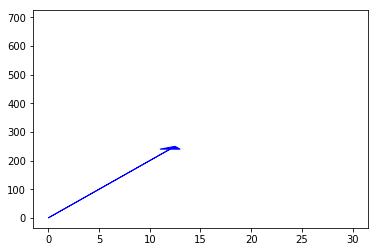

In [2]:
c = 12

#hack to inicialize bounds of plot (need this to get the arrows to work?)
plt.plot(0,0)
plt.plot(30,690)

# Plot the first arrow 
plt.arrow(0, 0, c*1, c*20,head_width=2, head_length=10, fc='blue', ec='blue')

Then, we plot the second column as a vector by adding it to the first one. This ```arrow``` starts at the end of the previous vector and "add" the second column vector:

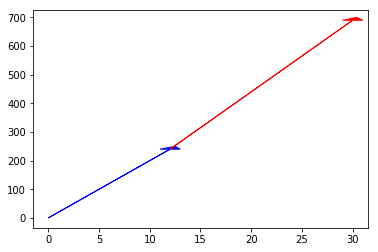

In [3]:
b = 18

#hack to inicialize bounds of plot (need this to get the arrows to work?)
plt.plot(0,0)
plt.plot(30,690)

# Plot the first arrow
plt.arrow(0, 0, c*1, c*20,head_width=2, head_length=10, fc='blue', ec='blue')

#Plot the second arrow starting at the end of the first
plt.arrow(c, c*20, b*1, b*25, head_width=2, head_length=10, fc='red', ec='red')

The takeaway to this figure is that these two column vectors, when added together, end up at the a point that represents the right hand side of the above equation (i.e. 30, 690). 

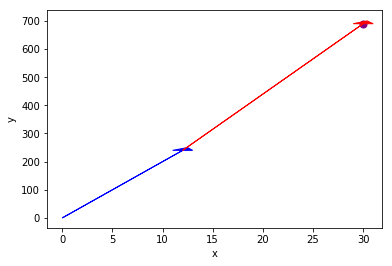

In [4]:
#hack to inicialize bounds of plot (need this to get the arrows to work?)
plt.plot(0,0)
plt.plot(30,690)

# Plot the first arrow
plt.arrow(0, 0, c*1, c*20,head_width=2, head_length=10, fc='blue', ec='blue')

#Plot the second arrow starting at the end of the first
plt.arrow(c, c*20, b*1, b*25, head_width=2, head_length=10, fc='red', ec='red')

#Plot a righthand column vector as a point.
plt.scatter(30,690, color='purple', s=50)
plt.xlabel('x');
plt.ylabel('y');

We say that the two column vectors "**span**" the $xy$-plane.  This means that any point on the $xy$-plane can be represented as a linear combination of the two vectors.  

<font color=red>**QUESTION:**</font> Give an example of two column vectors that do **NOT** span the $xy-$plane:

$ \left[
\begin{matrix}
    0 \\ 20  
 \end{matrix}
\right]$
and
$ \left[
\begin{matrix}
    0 \\ 3  
 \end{matrix}
\right]$

Have to be in the same direction/colinear

----

# 2. Review
- Pre-class assignment - [02--Python_Linear_Algebra_Packages-pre-class-assignment](02--Python_Linear_Algebra_Packages-pre-class-assignment.ipynb)


----
# 3. Solving Systems of Linear equations 
Remember the following set of equations from the mass weight example:

<img src="https://goo.gl/h2cqwE" align="center" width="70%">

$$40A + 15B = 100$$
$$25B = 50 + 50A$$


<font color=red>**QUESTION:**</font>  Formulate the above system of equations as the problem $Ax=b$. Define the matrices $A$ and $b$ as ```numpy``` matrices:

In [30]:
#Put your code here
A = np.matrix([[40,15],[-50,25]])
b = np.matrix([[100],[50]])

<font color=red>**QUESTION:**</font>  solve the above system of equations using the ```np.linalg.solve``` function:

In [31]:
x = np.linalg.solve(A,b)
print(x)

[[1.]
 [4.]]


 <font color=red>**DO THIS:**</font> Write the code to draw the above solution as a column picture. 

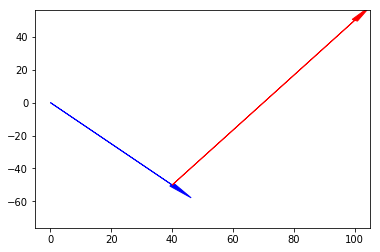

In [36]:
c = 1
b = 4
#hack to inicialize bounds of plot (need this to get the arrows to work?)
plt.plot(0,-70)
plt.plot(100,50)

# Plot the first arrow
plt.arrow(0, 0, c*40, c*-50,head_width=2, head_length=10, fc='blue', ec='blue')

#Plot the second arrow starting at the end of the first
plt.arrow(c*40, c*-50, b*15, b*25, head_width=2, head_length=10, fc='red', ec='red')

----
# 4. Practice - Curve Fitting Example

Consider the following polynomial that falls on the $xy$-plane:

$$y = ax^2 + bx + c$$


<font color=red>**Question a:**</font>  Assume that points (1,2), (-1,12), and (2,3) are on the polynomial. Generate a system of linear equations to solve for $a$, $b$, and $c$. Express your equations in the form $Ax=b$ and define $A$ and $b$ as numpy matrices.

In [39]:
A = np.matrix([[1,1,1],[1,-1,1],[4,2,1]])
b = np.matrix([[2],[12],[3]])
print(A)
print(b)

[[ 1  1  1]
 [ 1 -1  1]
 [ 4  2  1]]
[[ 2]
 [12]
 [ 3]]


<font color=red>** Question b:**</font> Write the code to solve for $x$ (i.e., ($a,b,c$)) using ```numpy```.

In [41]:
np.linalg.solve(A,b)

matrix([[ 2.],
        [-5.],
        [ 5.]])

<font color=red>** Question c:**</font> Given the value of your $x$ matrix derived in the previous question, what are the values for $a$, $b$, and $c$?

In [44]:
#Put your answer to the above question here.
a = 2
b = -5
c = 5

Assuming the above is correct, the following code will print your 2nd order polynomial and plot the original points:

Text(0,0.5,'y-axis')

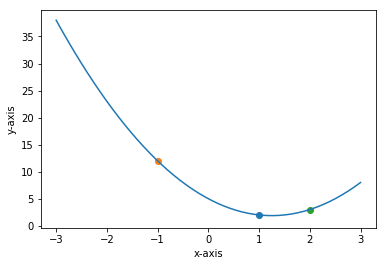

In [45]:
x = np.linspace(-3,3)
y = a*x**2 + b*x + c

#plot the function. (Transpose is needed to make the data line up).
plt.plot(x,y.transpose())

#Plot the original points
plt.scatter(1, 2)
plt.scatter(-1, 12)
plt.scatter(2, 3)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

&#9989; <font color=red>** Question d:**</font> The following program is intended to take four points as inputs ($p1, p2, p3, p4 \in R^2$) and calculate the coefficients $a$, $b$, $c$, and $d$ so that the graph of $f(x) = ax^3 + bx^2 + cx + d$ passes smoothly through the points.  Test the function with the following points (1,2), (-1,6), (2,3), (3,2) as inputs and print the values for $a$, $b$, $c$, and $d$.

In [76]:
def fitPoly3(p1,p2,p3,p4):
    A = np.matrix([[p1[0]**3, p1[0]**2, p1[0], 1],
                   [p2[0]**3, p2[0]**2, p2[0], 1],
                   [p3[0]**3, p3[0]**2, p3[0], 1],
                   [p4[0]**3, p4[0]**2, p4[0], 1]])
    
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T

    X = np.linalg.solve(A, b)
    a = X.item(0)
    b = X.item(1)
    c = X.item(2)
    d = X.item(3)
    
    #Try putting your figure generation code here
    x = np.linspace(-3,3)
    y = a*x**3 + b*x**2 + c*x + d

    #plot the function. (Transpose is needed to make the data line up).
    plt.plot(x,y.transpose())

    #Plot the original points
    plt.scatter(p1[0],p1[1])
    plt.scatter(p2[0],p2[1])
    plt.scatter(p3[0],p3[1])
    plt.scatter(p4[0],p4[1])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    
    return (a,b,c,d)

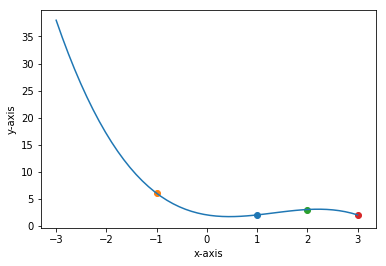

In [77]:
p1 = [1,2]
p2 = [-1,6]
p3 = [2,3]
p4 = [3,2]
coef = fitPoly3(p1,p2,p3,p4)
coef

<font color=red>**Question e**</font> Modify the above ```fitpoly3``` function to also generate a figure of the input points and the resulting polynomial in range ```x=(-3,3)```. 

In [78]:
# Put the answer to the above question above or copy and paste the above function and modify it in this cell. 

&#9989; <font color=red>**Question f**</font> Give any four $R^2$ input points to ```fitPoly3```, is there always a unique solution?  Explain your answer. 

In [84]:
p1 = [0,2]
p2 = [0,4]
p3 = [2,3]
p4 = [3,2]
coef = fitPoly3(p1,p2,p3,p4)
coef
#Example of no solution
# Two equations would contradict, through any x there can be only one y

LinAlgError: Singular matrix

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


-----
### Congratulations, we're done!

&#169; Copyright 2018,  Michigan State University Board of Trustees